4.10.2 Profiling Analysis

This notebook completes a k mean clustering analysis for the entire poc data frame. It also walks through the logic of how it was arrived to.

## Outline

1. Outline

2. Import

3. Profiling Exploration

    3.1  Variables to Profile Options

    3.2  Income histogram Exploration

4. Conducting K Mean Clustering

5. Exploring Clusters

6. Export

## Import

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
poc1 = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/Poc DF with Region.pkl')

In [4]:
poc1.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,...,order_freq_flag,first_name,last_name,gender,state,age,n_dependants,martial_status,income,region
0,2539329,1,1,2,8,NaN,196.0,0.0,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,3
1,2398795,1,2,3,7,15.0,196.0,1.0,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,3


Below is for K means clustering using machine learning

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
#installed kneed seperate

In [7]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [8]:
from kneed import KneeLocator

In [9]:
#Seperate Library 

In [10]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Profiling Exploration

### Variables to Profile Options

In [10]:
poc1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_2', 'order_amount', 'loyalty_flag', 'spend_flag',
       'order_freq', 'order_freq_flag', 'first_name', 'last_name', 'gender',
       'state', 'age', 'n_dependants', 'martial_status', 'income', 'region'],
      dtype='object')

In [11]:
#Specfied from Company

#age
#income
#certain goods in the “department_id” column
#number of dependents 
#orders_day_of_the_week
#order_hour_of_day

In [12]:
#Standout to Me

#order_dow
#order_amount
#loyalty_flag
#order_freq
#martial_status


### Income Histogram Exploration

In [13]:
#starting with a histogram to determine number of clusters

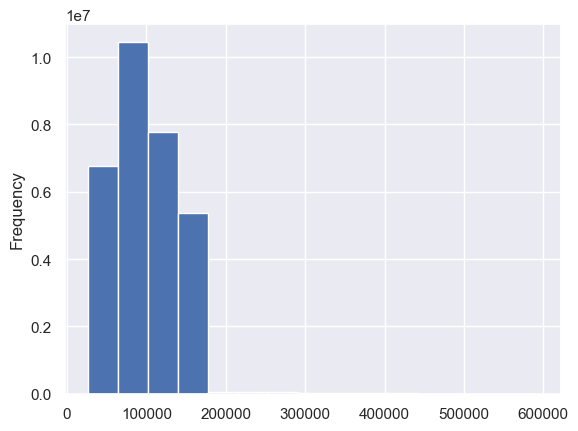

In [14]:
poc_histo_income = poc1['income'].plot.hist(bins = 15)

In [15]:
#now checking for skewed data

Since we have one customer that has a large income with multiple orders; I am going to grouby user_id

In [ ]:
grouped = poc1.groupby('user_id').mean('income')

In [ ]:
grouped.head(3)

In [ ]:
#re-doing the histogram with the new grouping

In [ ]:
income_grouped = grouped['income'].plot.hist(bins = 30)

In [ ]:
grouped.nlargest(5, 'income')

After rechecking income, we still have lots of customers with income far outside the norm. Because of this, I have decided to use K mean clustering to better segment our data.

## Conducting K Mean Clustering

In [11]:
#Conducting K Mean Clustering with age & income

In [12]:
poc1.columns.get_loc('income') 

27

In [13]:
x = poc1.iloc[:,[2, 27]]

In [14]:
means = KMeans(n_clusters=4)

In [15]:
kmeans = KMeans(4)
means.fit(x)


KMeans(n_clusters=4)

In [16]:
#part 2

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [19]:
data_with_clusters = poc1.copy()
data_with_clusters['Clusters'] = identified_clusters 

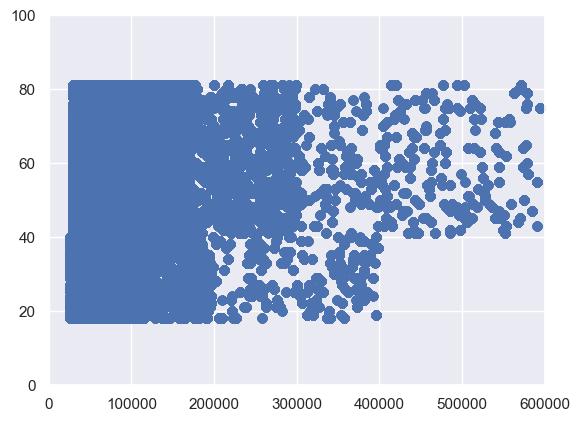

In [22]:
#To check shape before running
plt.scatter(poc1['income'],poc1['age'])
plt.xlim(0,600000)
plt.ylim(0,100)
plt.show()

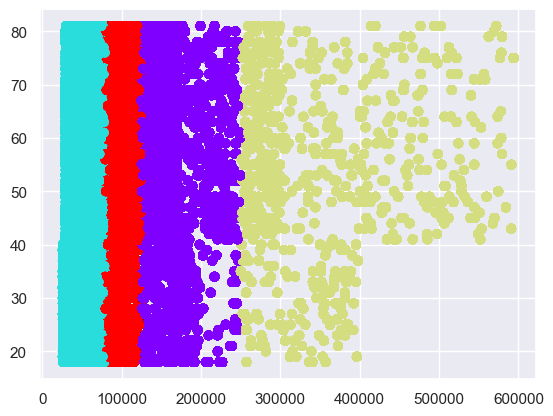

In [23]:
#takes around 15min. to run
cluster_chart = plt.scatter(data_with_clusters['income'],data_with_clusters['age'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [24]:
#part 3 (Checking if correct # of clusters)

In [25]:
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Text(0, 0.5, 'WCSS')

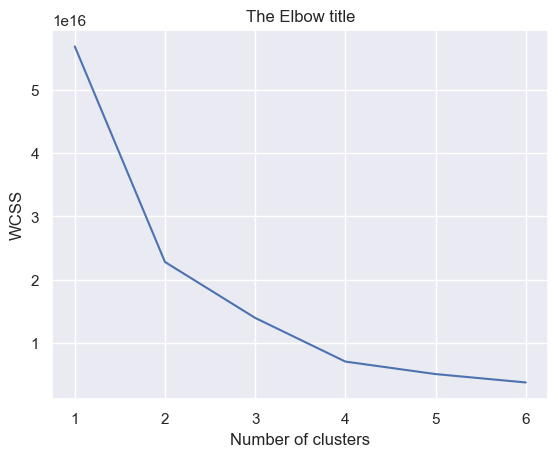

In [26]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


## Exploring Clusters

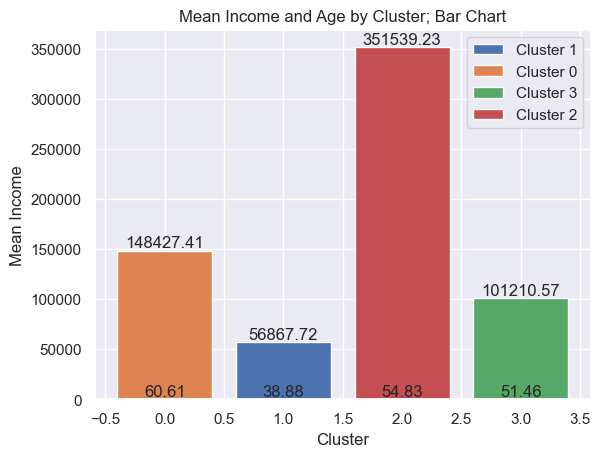

In [46]:
for cluster in data_with_clusters['Clusters'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Clusters'] == cluster]
    cluster_income_mean = cluster_data['income'].mean()
    cluster_age_mean = cluster_data['age'].mean()
   
    pic1 = plt.bar(cluster, [cluster_income_mean, cluster_age_mean], label='Cluster {}'.format(cluster))
    plt.text(cluster, cluster_income_mean, round(cluster_income_mean, 2), ha='center', va='bottom')
    plt.text(cluster, cluster_age_mean, round(cluster_age_mean, 2), ha='center', va='bottom')
plt.title("Mean Income and Age by Cluster; Bar Chart")    
plt.xlabel('Cluster')
plt.ylabel('Mean Income')
plt.legend()
plt.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Mean Income and Age by Cluster; Bar Chart.png'))
plt.show()

In [28]:
#asigning segment to user_id
poc1['segment'] = data_with_clusters['Clusters']

In [29]:
poc1.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,...,first_name,last_name,gender,state,age,n_dependants,martial_status,income,region,Segment
0,2539329,1,1,2,8,NaN,196.0,0.0,Soda,77,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,3,1
1,2398795,1,2,3,7,15.0,196.0,1.0,Soda,77,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,3,1


In [31]:
poc1['Segment'].max()

3

## Export

In [32]:
#POC Df with Segments; pkl
poc1.to_pickle('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/POC Df with Segments; pkl.pkl', )

In [ ]:
#Age and Income Correlation Segment Breakdown; Scatter Chart
cluster_chart.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Age and Income Correlation Segment Breakdown; Scatter Chart.png'))

In [47]:
#Mean Income and Age by Cluster; Bar Chart
#see chart code for save